In [63]:
import pandas as pd
import numpy as np

Load and show the dataframe shape.

In [64]:
customer_data = pd.read_csv('c:/users/ameli/IRONHACK/WEEK_1/DAY_2/AFTERNOON_SESSION/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
customer_data = customer_data.drop(['Unnamed: 0'], axis=1)
display(customer_data)
print('Df shape:', customer_data.shape)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


Df shape: (10910, 25)


Standardize header names.

In [65]:
def standardize_data (df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = list(map(lambda x: x.replace(" ", "_"), df.columns))
    df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']] = df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']].apply(round,1)
    return df

print('Before standardization:\n', customer_data.columns)
customer_data = standardize_data(customer_data)
print('\nAfter standardization:\n', customer_data.columns)




Before standardization:
 Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

After standardization:
 Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_c

Which columns are numerical?

In [66]:
print('Numerical cols are:', list(customer_data._get_numeric_data().columns))

Numerical cols are: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


Which columns are categorical?

In [67]:
print('Categorical cols are:', list(customer_data.select_dtypes(['object']).columns))

Categorical cols are: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


Check and deal with NaN values.

In [68]:
# We can see that there're more than 600 nan values in customer_lifetime_value, response, months_since_last_claim,
# number_of_open_complaints, vehicle_class and vehicle_size columns. The number of nan values on vehicle_type col
# exceeds 5.000. Let's create a df in order to see it more clearly
nan_values = pd.DataFrame(round(customer_data.isna().sum()/len(customer_data),4)*100).reset_index()
nan_values.columns = ['header', 'percent_nulls']
nan_values = nan_values[nan_values['percent_nulls'] > 2]
display(nan_values)

,header,percent_nulls
1,state,5.78
3,response,5.78
13,months_since_last_claim,5.80
15,number_of_open_complaints,5.80
22,vehicle_class,5.70
23,vehicle_size,5.70
24,vehicle_type,50.25


In [69]:
# As none of the observations are less than 2%, we're going to use the fillna() function for the numeric columns with less than 40%
# nan values. For vehicle_type, we're going to drop the entire column as it contains more than 40% nan values. 
# Source: https://bit.ly/3z0Me6K
customer_data = customer_data.drop('vehicle_type', axis=1)
print(customer_data.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


Most frequent value is: 0.0
Mean of number of open complaints is: 0.38425610586747105
Median of number of open complaints is: 0.0


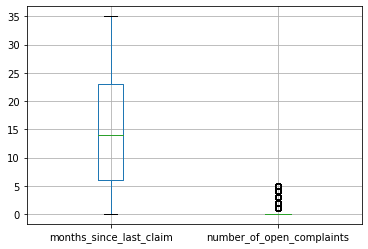

In [70]:
# Next step: fill missing values. Let's see if there are extreme values with a boxplot for the numerical columns
nan_boxplot = customer_data.boxplot(column=['months_since_last_claim','number_of_open_complaints'])

# There are some extreme values in the number_of_open_complaints column that will affect the mean.
most_freq_complaints = customer_data['number_of_open_complaints'].value_counts().idxmax()
print('Most frequent value is:', most_freq_complaints)
mean_complaints = np.mean(customer_data['number_of_open_complaints'])
print('Mean of number of open complaints is:', mean_complaints)
median_complaints = np.nanmedian(customer_data['number_of_open_complaints'])
print('Median of number of open complaints is:', median_complaints)

# Therefore, we're going to replace nan values with the most frequent value
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'] .fillna(most_freq_complaints)

In [71]:
# The months_since_last_claim column data does not present extreme values, so we can replace the nan values with the mean
mean_months_claim = np.mean(customer_data['months_since_last_claim'])
print('Mean of months since last claim is:', mean_months_claim)
customer_data['months_since_last_claim'] = round(customer_data['months_since_last_claim'] .fillna(mean_months_claim),1)

Mean of months since last claim is: 15.149070740488469


In [72]:
# Now we need to handle the nan values present on categorial columns. As we don't have business knowledge domain and can't
# infer properties yet, we'll replace the nan values with "Unknown" category
customer_data['state'] = customer_data['state'].fillna("Unknown")
customer_data['response'] = customer_data['response'].fillna("Unknown")
customer_data['vehicle_class'] = customer_data['vehicle_class'].fillna("Unknown")
customer_data['vehicle_size'] = customer_data['vehicle_size'].fillna("Unknown")

In [73]:
# Do we still have nan values in our dataframe?
print(customer_data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [74]:
# Function to extract month name from date and create
def get_month(df):
    df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    months_list = [df['month'][i].strftime(format="%B") for i in range(len(df['month']))]
    return months_list
     
customer_data['month'] = get_month(customer_data)

# Dataframe filtered by first quarter data, althought there're already only values for January and February on the original df
customer_data[customer_data['month'].isin(['January', 'February'])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,Suburban,Married,117,15.1,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,Suburban,Married,253,15.1,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,February


BONUS: Put all the previously mentioned data transformations into a function.

In [75]:
bonus_df = pd.read_csv('c:/users/ameli/IRONHACK/WEEK_1/DAY_2/AFTERNOON_SESSION/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
bonus_df = bonus_df.drop(['Unnamed: 0'], axis=1)

def clean_df(df):   
    
    # In this exercise, we define a function to handle nan values more quickly than before
    def identify_nan(df):
        nan_list = df.isnull().sum()
        drop_col = [i for i,v in nan_list.items() if (v/len(df)) > 0.40]
        fillna = [i for i,v in nan_list.items() if ((v/len(df)) > 0.02 and (v/len(df)) < 0.40)]
        for col in fillna:
            if (col == 'number_of_open_complaints'):
                median_oc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_oc)
            elif (col == 'months_since_last_claim'):
                median_lc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
                df[col] = df[col].fillna(median_lc)
            else:
                df[col] = df[col].fillna('Unknown')
        df = df.drop(drop_col, axis=1)
        return df
    
    #Apply functions
    headers_standard = standardize_data(df)
    print('Categorical cols are {} and numerical cols are {}:'.
          format(list(df.select_dtypes(['object']).columns),
                 list(df._get_numeric_data().columns)))
    no_nan = identify_nan(headers_standard)
    df['month'] = get_month(no_nan)
    df_filtered = df[df['month'].isin(['January', 'February'])]
    return df_filtered


bonus_solution = clean_df(bonus_df)
display(bonus_solution)

Categorical cols are ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'] and numerical cols are ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']:


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,A,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,A,February


### Lab | Customer Analysis Round 3

In [76]:
display(customer_data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,Suburban,Married,117,15.1,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.0,No,Premium,Bachelor,1/19/11,Unemployed,F,0.0,Suburban,Married,253,15.1,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.0,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.0,No,Basic,College,1/6/11,Employed,F,61146.0,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.0,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.0,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.0,Luxury SUV,Medsize,February
10908,WA60547,California,11972.0,No,Premium,College,2/13/11,Employed,F,64195.0,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.0,SUV,Medsize,February


Show DataFrame info.

In [77]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  float64
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

Describe DataFrame.

In [78]:
round(customer_data.describe(),1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0
mean,8018.2,37536.3,93.2,15.1,48.1,0.4,3.0,434.9
std,6885.1,30359.2,34.4,9.8,27.9,0.9,2.4,292.2
min,1898.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0
25%,4014.0,0.0,68.0,7.0,24.0,0.0,1.0,271.0
50%,5771.5,33813.5,83.0,15.0,48.0,0.0,2.0,382.5
75%,8993.0,62250.8,109.0,23.0,71.0,0.0,4.0,547.0
max,83325.0,99981.0,298.0,35.0,99.0,5.0,9.0,2893.0


Show a plot of the total number of responses.

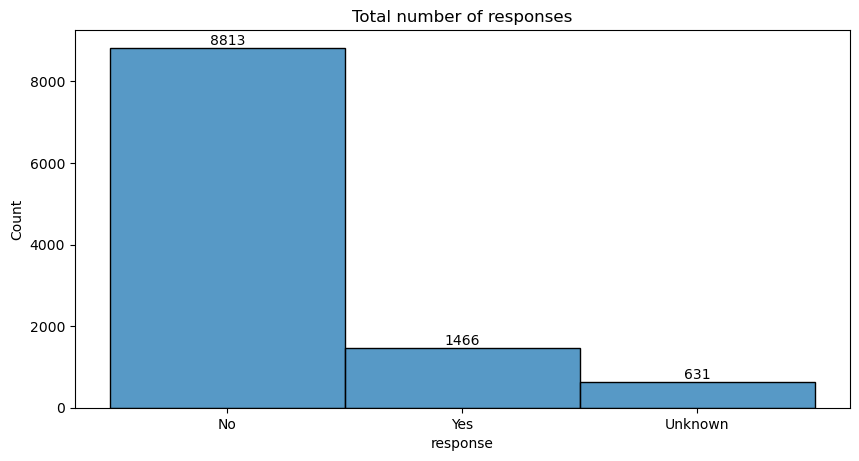

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
chart = sns.histplot(customer_data['response'])
chart.bar_label(chart.containers[0])
plt.title('Total number of responses')

plt.show()

Show a plot of the response rate by the sales channel.

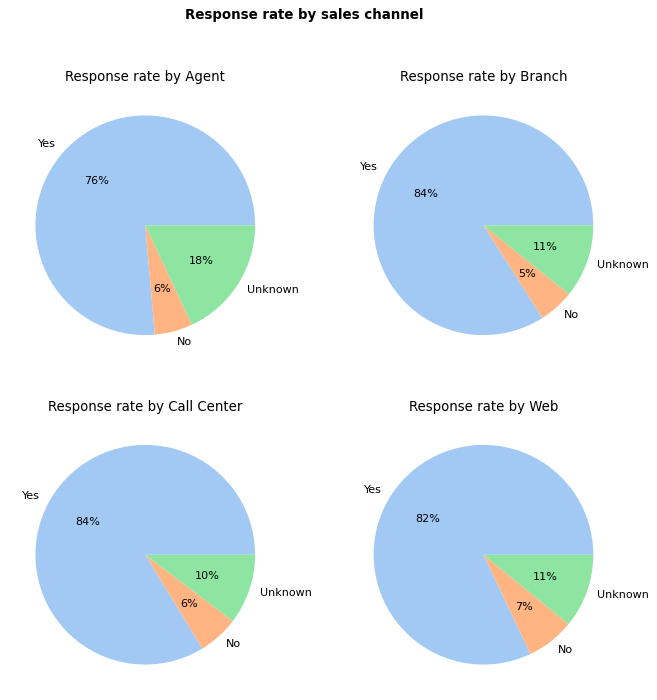

In [80]:
customer_data['response'].value_counts()
customer_data['sales_channel'].value_counts()

# ratio si / agent
info_rates_dict = customer_data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().to_dict(orient='index')
    
fig, ax = plt.subplots(2, 2, figsize = (10,10), dpi = 80)
labels = ['Yes', 'No', 'Unknown']
colors = sns.color_palette('pastel')
plt.suptitle('Response rate by sales channel').set_fontweight('bold')


# Plotting values
agent = ax[0][0].pie(info_rates_dict['Agent'].values(), labels = labels, colors = colors, autopct = '%0.0f%%')
branch = ax[0][1].pie(info_rates_dict['Branch'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
call_center = ax[1][0].pie(info_rates_dict['Call Center'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
web = ax[1][1].pie(info_rates_dict['Web'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')

# Setting titles for every plot
ax[0][0].set_title('Response rate by Agent')
ax[0][1].set_title('Response rate by Branch')
ax[1][0].set_title('Response rate by Call Center')
ax[1][1].set_title('Response rate by Web')

plt.show()

Show a plot of the response rate by the total claim amount.

,Intervals,No %,Yes %,Unknown %
0,0-500,81.22,12.74,6.04
1,500-1000,79.63,15.11,5.26
2,1000-1500,78.57,16.50,4.93
3,1500-2000,95.24,0.00,4.76
4,2000-2500,88.89,0.00,11.11
5,2500-3000,100.00,0.00,0.00


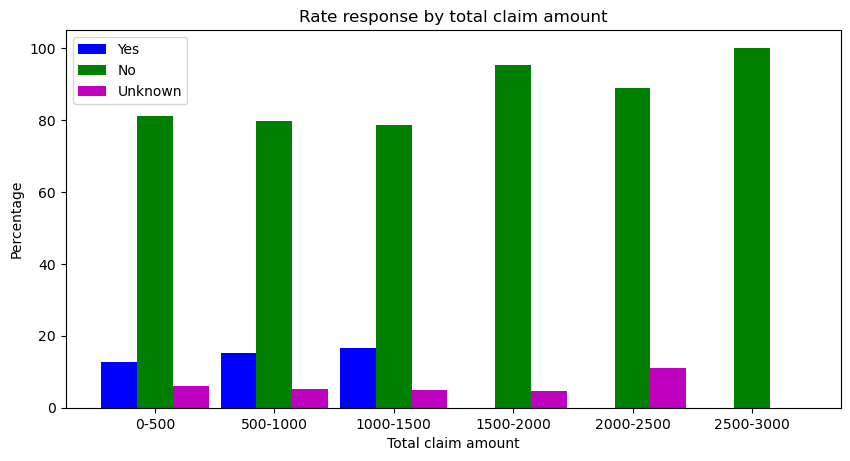

In [81]:
bins = [500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
values = []
count = 0

for num in bins:
    filtered = customer_data.loc[(customer_data['total_claim_amount'] >= count) & (customer_data['total_claim_amount'] < num)]
    count = num
    groupedby = filtered.groupby('response')['total_claim_amount'].count().to_dict()
    values.append(groupedby)

new_df = pd.DataFrame(values)
new_df['Intervals'] = labels
new_df = new_df.fillna(0)
new_df['No %'] = new_df['No'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df['Yes %'] = new_df['Yes'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df['Unknown %'] = new_df['Unknown'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df = new_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(round(new_df,2))

#new_df.plot(x='Intervals', kind='bar',stacked=False, title='Grouped Bar Graph with dataframe')
fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis = np.arange(len(labels))
plt.bar(x_axis-0.3, new_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis, new_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis+0.3, new_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by total claim amount')
plt.xlabel("Total claim amount", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis, labels)
plt.legend()


plt.show()

Show a plot of the response rate by income.

,Intervals,No %,Yes %,Unknown %
0,0-20.000,66.77,28.48,4.75
1,20.000-40.000,75.52,19.05,5.43
2,40.000-60.000,77.99,16.63,5.38
3,60.000-80.000,78.16,16.12,5.72
4,80.000-100.000,79.05,15.27,5.69


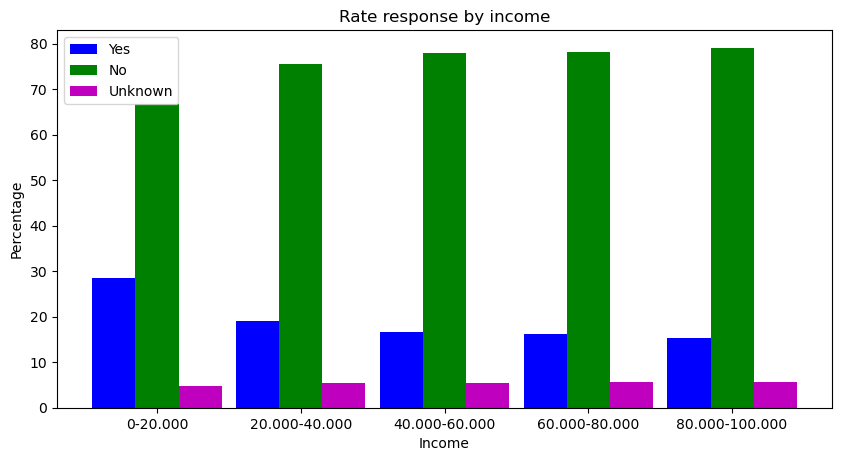

In [82]:
bins_income = [20000, 40000, 60000, 80000, 100000]
labels_income = ['0-20.000', '20.000-40.000', '40.000-60.000', '60.000-80.000', '80.000-100.000']
values_income = []
count_income = 0

for num in bins_income:
    filtered_income = customer_data.loc[(customer_data['income'] >= count) & (customer_data['income'] < num)]
    count_income = num
    groupedby_income = filtered_income.groupby('response')['income'].count().to_dict()
    values_income.append(groupedby_income)

new_income_df = pd.DataFrame(values_income)
new_income_df['Intervals'] = labels_income
new_income_df = new_income_df.fillna(0)
new_income_df['No %'] = new_income_df['No'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df['Yes %'] = new_income_df['Yes'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df['Unknown %'] = new_income_df['Unknown'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df = new_income_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(round(new_income_df,2))

fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis_income = np.arange(len(labels_income))
plt.bar(x_axis_income-0.3, new_income_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis_income, new_income_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis_income+0.3, new_income_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by income')
plt.xlabel("Income", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis_income, labels_income)
plt.legend(loc='upper left')

plt.show()

### Lab | Customer Analysis Round 4

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [83]:
print(customer_data.dtypes)

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                           float64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
month           

In [84]:
numerical = customer_data.select_dtypes(['int','float']).reset_index(drop = True)
categorical = customer_data.select_dtypes('object').reset_index(drop = True)

display(round(numerical),2)
display(categorical)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029.0,61,7.0,52,0.0,9,293.0
1,2229.0,0.0,64,3.0,26,0.0,1,745.0
2,14948.0,22139.0,100,34.0,31,0.0,2,480.0
3,22332.0,49078.0,97,10.0,3,0.0,2,484.0
4,9025.0,23675.0,117,15.0,31,0.0,7,708.0
...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,253,15.0,40,0.0,7,1214.0
10906,5259.0,61146.0,65,7.0,68,0.0,6,273.0
10907,23893.0,39837.0,201,11.0,63,0.0,2,381.0
10908,11972.0,64195.0,158,0.0,27,4.0,6,618.0


2

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,February
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,January
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,February
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,January
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,January
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,January
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,February
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,February


Now we will try to check the normality of the numerical variables visually.
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

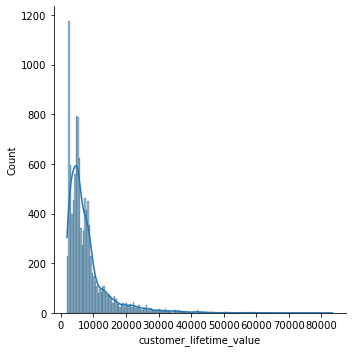

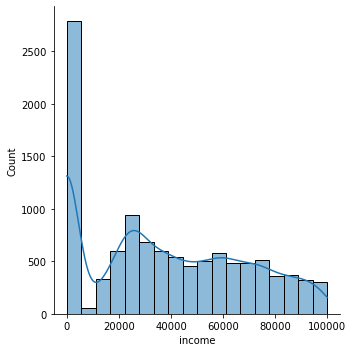

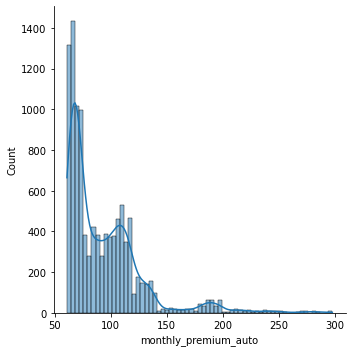

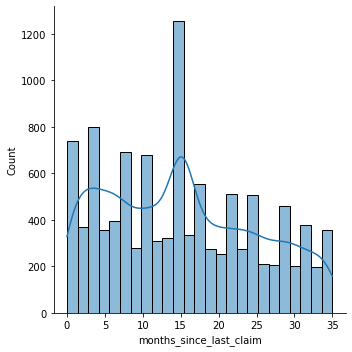

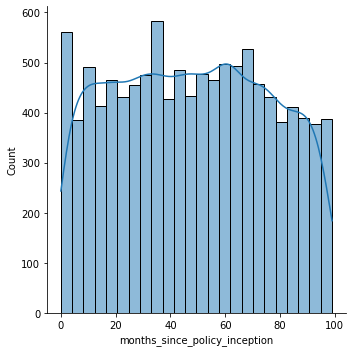

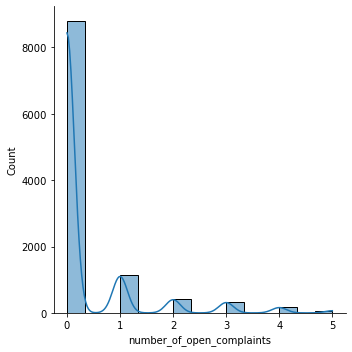

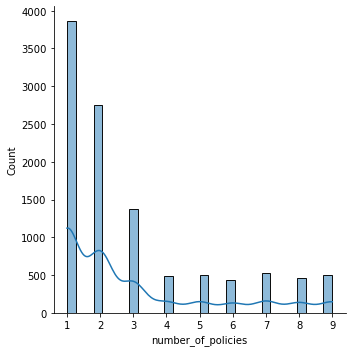

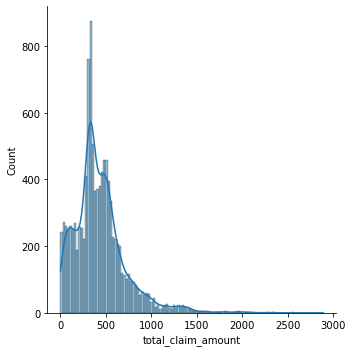

In [85]:
# Plotting distribution charts with seaborn
seaborn_charts = [sns.displot(numerical[col], kde = 'kind') for col in numerical.columns]
plt.show()

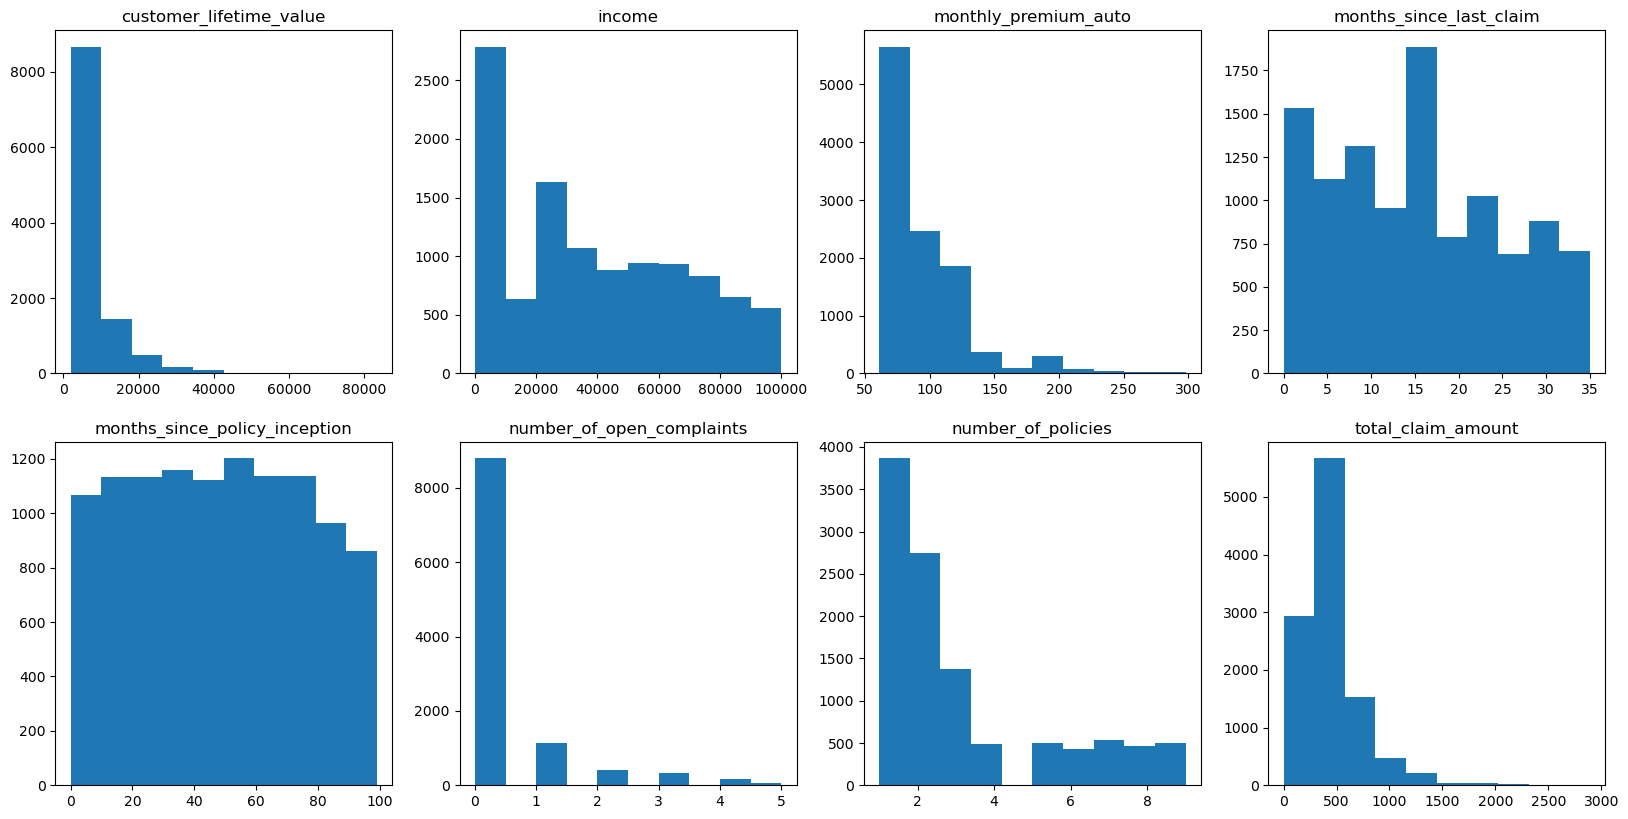

In [86]:
# Plotting histogram charts with matplotlib
fig, ax = plt.subplots(2,4, figsize = (20,10), dpi = 100)

ax[0][0].hist(numerical['customer_lifetime_value'])
ax[0][1].hist(numerical['income'])
ax[0][2].hist(numerical['monthly_premium_auto'])
ax[0][3].hist(numerical['months_since_last_claim'])
ax[1][0].hist(numerical['months_since_policy_inception'])
ax[1][1].hist(numerical['number_of_open_complaints'])
ax[1][2].hist(numerical['number_of_policies'])
ax[1][3].hist(numerical['total_claim_amount'])

ax[0][0].set_title('customer_lifetime_value')
ax[0][1].set_title('income')
ax[0][2].set_title('monthly_premium_auto')
ax[0][3].set_title('months_since_last_claim')
ax[1][0].set_title('months_since_policy_inception')
ax[1][1].set_title('number_of_open_complaints')
ax[1][2].set_title('number_of_policies')
ax[1][3].set_title('total_claim_amount')

plt.show()

                                 count     mean      std     min     25%  \
customer_lifetime_value        10910.0   8018.2   6885.1  1898.0  4014.0   
income                         10910.0  37536.3  30359.2     0.0     0.0   
monthly_premium_auto           10910.0     93.2     34.4    61.0    68.0   
months_since_last_claim        10910.0     15.1      9.8     0.0     7.0   
months_since_policy_inception  10910.0     48.1     27.9     0.0    24.0   
number_of_open_complaints      10910.0      0.4      0.9     0.0     0.0   
number_of_policies             10910.0      3.0      2.4     1.0     1.0   
total_claim_amount             10910.0    434.9    292.2     0.0   271.0   

                                   50%      75%      max  
customer_lifetime_value         5771.5   8993.0  83325.0  
income                         33813.5  62250.8  99981.0  
monthly_premium_auto              83.0    109.0    298.0  
months_since_last_claim           15.0     23.0     35.0  
months_since_policy_

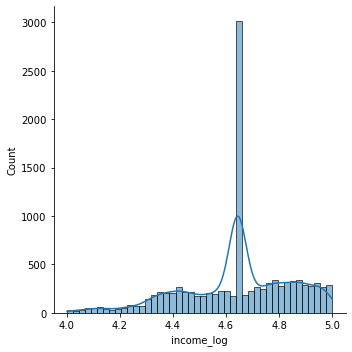

BoxCox transformation applied:


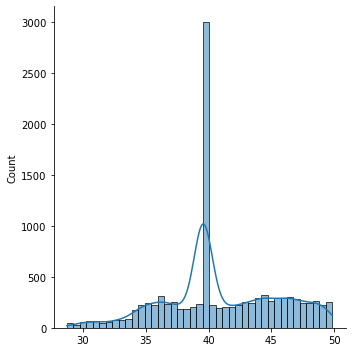

In [87]:
# Do the distributions for different numerical variables look like a normal distribution
from scipy import stats
from scipy.stats import skew

# From the previous exercise we've checked visually that none out the columns follows a normal distribution and most of them presents
# positive skewness. Now, in order to decide which method are going to use to normalize our data, let's take another look to 
# our numerical data.
print(round(numerical.describe(),1).T, '\n')
numerical_copy = numerical.copy()

# What are we seeing?
# - Data units and ranges are different
# - Looks like there are some extreme values our outliers in income, monthly_premium_auto and total_claim_amout cols
# - Mean value is more than median (50% quartil) value

print('Skew of numerical[income]:', skew(numerical_copy['income']),'\n') # - Skew is neither between [-2,2] or [0,2] and is positive 

# Testing log transformation
def log_transform(x):
    if x > 0:
        x = np.log10(x)
        if np.isfinite(x):
            return x
        else:
            return np.NAN

numerical_copy['income_log'] = list(map(log_transform, numerical_copy['income']))
numerical_copy['income_log'] = numerical_copy['income_log'].fillna(np.mean(numerical_copy['income_log']))
print('Log transformation applied: \n')
sns.displot(numerical_copy['income_log'], kde='kind')
plt.show()

# Testing BoxCox transformation
numerical_copy['income_bxcx'] = np.where(numerical_copy['income'] <=0, 0, numerical_copy['income'])
mean_income = numerical_copy['income_bxcx'].mean()
numerical_copy['income_bxcx'] = numerical_copy['income_bxcx'].replace(0,mean_income)
# numerical = numerical.drop(['income'], axis = 1)

xt, lmbda = stats.boxcox(numerical_copy['income_bxcx'])
print('BoxCox transformation applied:')
sns.displot(xt, kde = 'kind')
plt.show()

Skew of numerical[total_claim_amount]: 1.7290588388926884 

Original distribution:


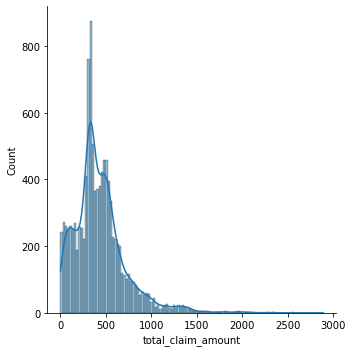

Log transformation applied: 



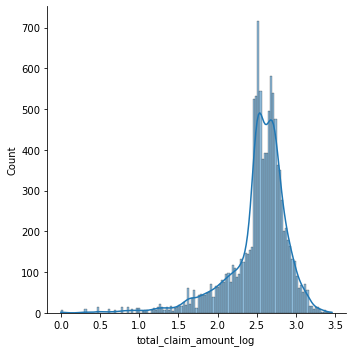

BoxCox transformation applied:


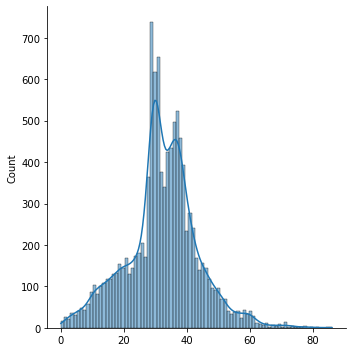

In [88]:
# Let's do the same with another column

# Although skewness is less than 2, let's try both transforming methods
print('Skew of numerical[total_claim_amount]:', skew(numerical_copy['total_claim_amount']),'\n') 

print('Original distribution:')
sns.displot(numerical_copy['total_claim_amount'], kde='kind')
plt.show()


# Testing log transformation
numerical_copy['total_claim_amount_log'] = list(map(log_transform, numerical_copy['total_claim_amount']))
numerical_copy['total_claim_amount_log'] = numerical_copy['total_claim_amount_log'].fillna(np.mean(numerical_copy['total_claim_amount_log']))
print('Log transformation applied: \n')
sns.displot(numerical_copy['total_claim_amount_log'], kde='kind')
plt.show()

# Testing BoxCox transformation
numerical_copy['total_claim_amount_bxcx'] = np.where(numerical_copy['total_claim_amount'] <=0, 0, numerical_copy['total_claim_amount'])
mean_income = numerical_copy['total_claim_amount_bxcx'].mean()
numerical_copy['total_claim_amount_bxcx'] = numerical_copy['total_claim_amount_bxcx'].replace(0,mean_income)
# numerical = numerical.drop(['income'], axis = 1)

xt, lmbda = stats.boxcox(numerical_copy['total_claim_amount_bxcx'])
print('BoxCox transformation applied:')
sns.displot(xt, kde = 'kind')
plt.show()

Skew of numerical[months_since_last_claim]: 0.2793600982929048 

Original distribution:


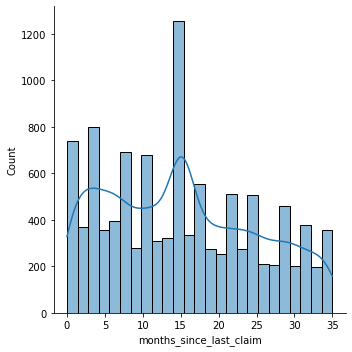

Log transformation applied: 



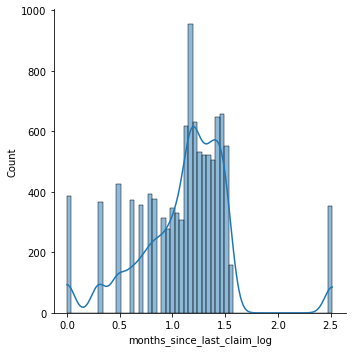

BoxCox transformation applied:


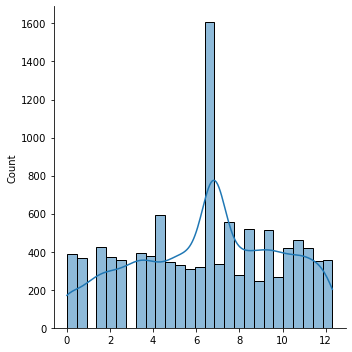

In [89]:
# Last test

# Although skewness is less than 2, let's try both transforming methods
print('Skew of numerical[months_since_last_claim]:', skew(numerical_copy['months_since_last_claim']),'\n') 

print('Original distribution:')
sns.displot(numerical_copy['months_since_last_claim'], kde='kind')
plt.show()

# Testing log transformation
numerical_copy['months_since_last_claim_log'] = list(map(log_transform, numerical_copy['months_since_last_claim']))
numerical_copy['months_since_last_claim_log'] = numerical_copy['months_since_last_claim_log'].fillna(np.mean(numerical_copy['total_claim_amount_log']))
print('Log transformation applied: \n')
sns.displot(numerical_copy['months_since_last_claim_log'], kde='kind')
plt.show()

# Testing BoxCox transformation
numerical_copy['months_since_last_claim_bxcx'] = np.where(numerical_copy['months_since_last_claim'] <=0, 0, numerical_copy['months_since_last_claim'])
mean_income = numerical_copy['months_since_last_claim_bxcx'].mean()
numerical_copy['months_since_last_claim_bxcx'] = numerical_copy['months_since_last_claim_bxcx'].replace(0,mean_income)
# numerical = numerical.drop(['income'], axis = 1)

xt, lmbda = stats.boxcox(numerical_copy['months_since_last_claim_bxcx'])
print('BoxCox transformation applied:')
sns.displot(xt, kde = 'kind')
plt.show()

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

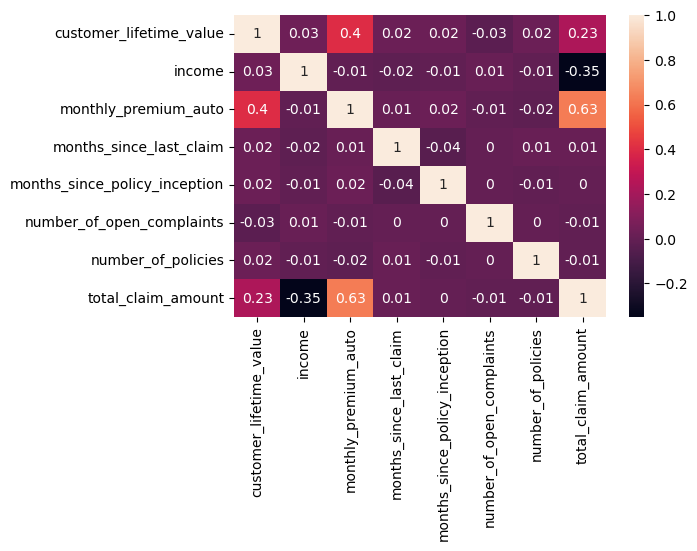

In [90]:
correlations_matrix = round(numerical.corr(),2)
fig, ax = plt.subplots(dpi=100)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [91]:
display(correlations_matrix)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.03,0.40,0.02,0.02,-0.03,0.02,0.23
income,0.03,1.00,-0.01,-0.02,-0.01,0.01,-0.01,-0.35
monthly_premium_auto,0.40,-0.01,1.00,0.01,0.02,-0.01,-0.02,0.63
months_since_last_claim,0.02,-0.02,0.01,1.00,-0.04,0.00,0.01,0.01
months_since_policy_inception,0.02,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.00
number_of_open_complaints,-0.03,0.01,-0.01,0.00,0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.02,0.01,-0.01,0.00,1.00,-0.01
total_claim_amount,0.23,-0.35,0.63,0.01,0.00,-0.01,-0.01,1.00


In [92]:
# There is no pair of features that have a high correlation (greather than 0.9)
correlations_matrix.where((correlations_matrix > 0.9) | (correlations_matrix < -0.9))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
months_since_last_claim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
months_since_policy_inception,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
number_of_open_complaints,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
number_of_policies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
total_claim_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Lab | Customer Analysis Round 5

X-y split.

In [93]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis=1)
display(X)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029.0,61,7.0,52,0.0,9
1,2229.0,0.0,64,3.0,26,0.0,1
2,14948.0,22139.0,100,34.0,31,0.0,2
3,22332.0,49078.0,97,10.0,3,0.0,2
4,9025.0,23675.0,117,15.1,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.0,0.0,253,15.1,40,0.0,7
10906,5259.0,61146.0,65,7.0,68,0.0,6
10907,23893.0,39837.0,201,11.0,63,0.0,2
10908,11972.0,64195.0,158,0.0,27,4.0,6


Normalize (numerical).

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Applying MinMaxScaler
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_norm_df = pd.DataFrame(x_normalized, columns=X.columns)
display(x_norm_df)

(10910, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035750,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004065,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160266,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250949,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087526,0.236795,0.236287,0.431429,0.313131,0.0,0.750
...,...,...,...,...,...,...,...
10905,0.167819,0.000000,0.810127,0.431429,0.404040,0.0,0.750
10906,0.041276,0.611576,0.016878,0.200000,0.686869,0.0,0.625
10907,0.270119,0.398446,0.590717,0.314286,0.636364,0.0,0.125
10908,0.123718,0.642072,0.409283,0.000000,0.272727,0.8,0.625


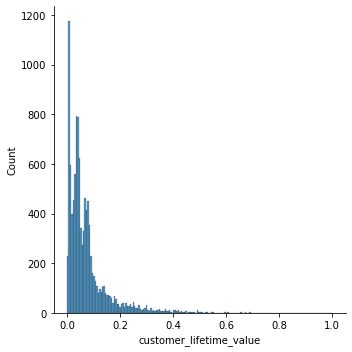

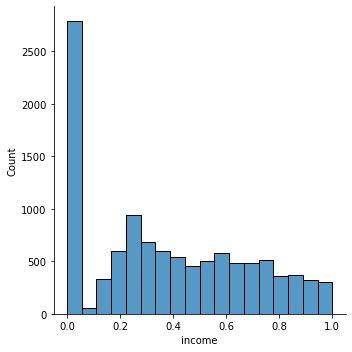

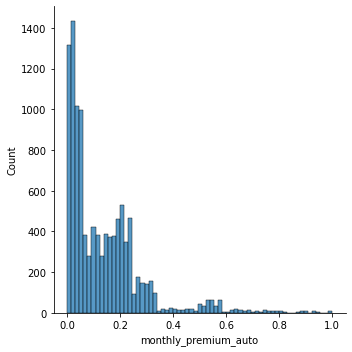

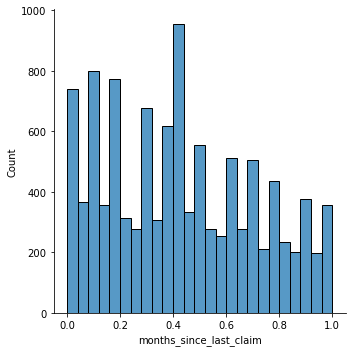

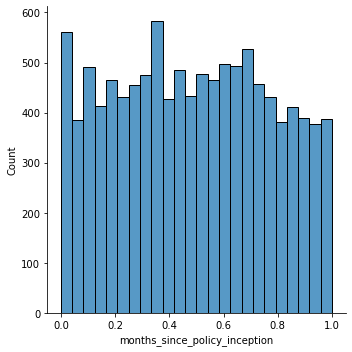

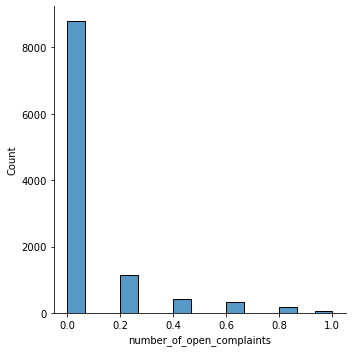

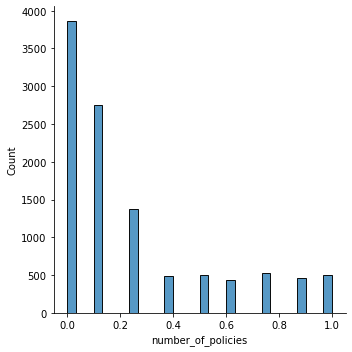

In [95]:
# Visualizing transformed data
for i in x_norm_df:
    sns.displot(x_norm_df[i])
    plt.show()

In [96]:
# Applying StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
x_standardized_df = pd.DataFrame(x_standardized, columns=X.columns)
display(x_standardized_df)

(10910, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.466137,0.345635,-0.934819,-0.832685,0.139877,-0.406656,2.509455
1,-0.840878,-1.236462,-0.847713,-1.241554,-0.790709,-0.406656,-0.824922
2,1.006534,-0.507194,0.197554,1.927182,-0.611750,-0.406656,-0.408125
3,2.079047,0.380189,0.110448,-0.526033,-1.613919,-0.406656,-0.408125
4,0.146229,-0.456597,0.691152,-0.004725,-0.611750,-0.406656,1.675860
...,...,...,...,...,...,...,...
10905,1.095862,-1.236462,4.639940,-0.004725,-0.289625,-0.406656,1.675860
10906,-0.400776,0.777715,-0.818678,-0.832685,0.712545,-0.406656,1.259063
10907,2.305779,0.075787,3.130109,-0.423816,0.533586,-0.406656,-0.408125
10908,0.574275,0.878150,1.881595,-1.548206,-0.754917,4.087257,1.259063


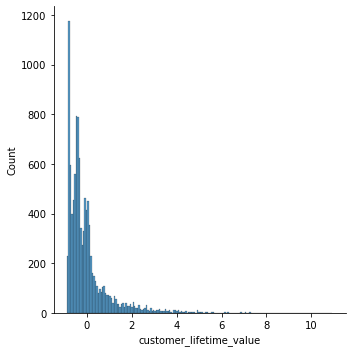

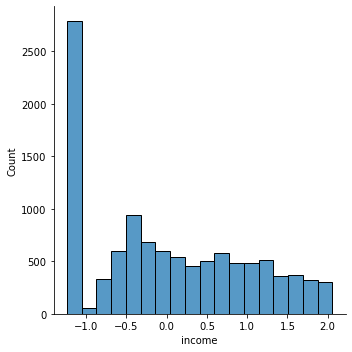

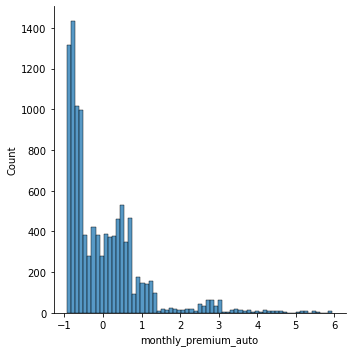

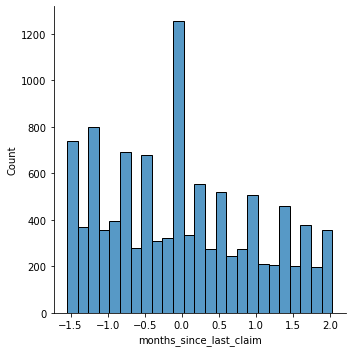

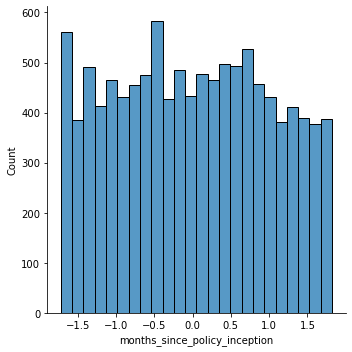

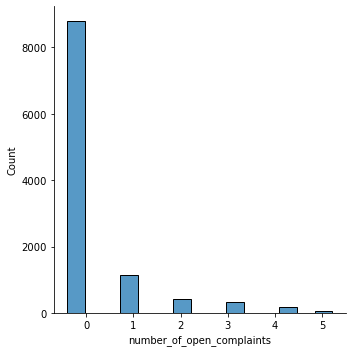

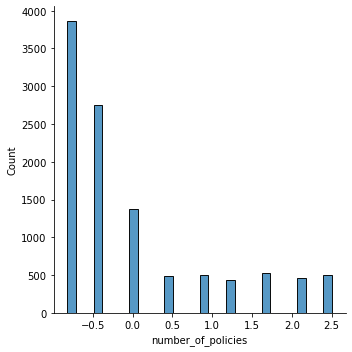

In [97]:
# Visualizing transformed data
for i in x_standardized_df:
    sns.displot(x_standardized_df[i])
    plt.show()

### Lab | Customer Analysis Round 6

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

One Hot/Label Encoding (categorical)

In [99]:
# With which data types are we working with?
print('Initial types:', categorical.dtypes, '\n')

# As default data type of our cols is object, let's force it to category type
categorical_to_label = categorical.copy()
categorical_to_label = categorical.astype('category')

print('Converted types:', categorical_to_label.dtypes)

Initial types: customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
month                object
dtype: object 

Converted types: customer             category
state                category
response             category
coverage             category
education            category
effective_to_date    category
employment_status    category
gender               category
location_code        category
marital_status       category
policy_type          category
policy               category
renew_offer_type     category
sales_channel        category
vehicle_class        category
vehicle_size         categ

In [100]:
# Now let's check how can we apply label encoding to some of the cols
labelencoder = LabelEncoder()
categorical_to_label['gender_cat'] = labelencoder.fit_transform(categorical_to_label['gender'])
categorical_to_label['education_cat'] = labelencoder.fit_transform(categorical_to_label['education'])
categorical_to_label['employment_status_cat'] = labelencoder.fit_transform(categorical_to_label['employment_status'])

In [101]:
# Now we'll apply the OneHotEncoder method over employment status column
categorical_hotenc = categorical.copy()
pd.set_option("display.max_columns", None)

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(categorical_hotenc[['employment_status']]).toarray())
categorical_hotenc = categorical_hotenc.join(enc_df)

For this exercise, we're going to select some cols that could be useful for our model and apply label encoder
Keeping in mind that our objective is to understand customer demographics and buying behavior in order to take targeted actions to increase profitable customer response, retention, and growth, for our model we will select and label the following columns:

- state
- response
- coverage
- education
- employment_status
- gender
- location_code
- marital_status
- policy_type
- sales_channel
- vehicle_class

In [102]:
# Initiate LabelEncoder instance
categorical_model = categorical.copy()

labelencoder = LabelEncoder()
categorical_model['state_cat'] = labelencoder.fit_transform(categorical_model['state'])
categorical_model['response_cat'] = labelencoder.fit_transform(categorical_model['response'])
categorical_model['coverage_cat'] = labelencoder.fit_transform(categorical_model['coverage'])
categorical_model['education_cat'] = labelencoder.fit_transform(categorical_model['education'])
categorical_model['employment_status_cat'] = labelencoder.fit_transform(categorical_model['employment_status'])
categorical_model['gender_cat'] = labelencoder.fit_transform(categorical_model['gender'])
categorical_model['location_code_cat'] = labelencoder.fit_transform(categorical_model['location_code'])
categorical_model['marital_status_cat'] = labelencoder.fit_transform(categorical_model['marital_status'])
categorical_model['policy_type_cat'] = labelencoder.fit_transform(categorical_model['policy_type'])
categorical_model['sales_channel_cat'] = labelencoder.fit_transform(categorical_model['sales_channel'])
categorical_model['vehicle_class_cat'] = labelencoder.fit_transform(categorical_model['vehicle_class'])

# Drop original cols and the ones we won't use in our model
categorical_model = categorical_model.drop(['state','response', 'coverage', 'education', 'employment_status',
                                             'gender', 'location_code', 'marital_status', 'policy_type',
                                             'sales_channel', 'vehicle_class', 'customer', 'effective_to_date',
                                             'policy', 'renew_offer_type', 'vehicle_size', 'month'], axis=1)

display(categorical_model)

,state_cat,response_cat,coverage_cat,education_cat,employment_status_cat,gender_cat,location_code_cat,marital_status_cat,policy_type_cat,sales_channel_cat,vehicle_class_cat
0,0,0,0,1,1,1,1,1,0,0,0
1,1,0,0,1,4,0,1,2,1,2,0
2,5,0,0,0,1,1,1,2,1,2,3
3,3,2,1,1,1,1,1,2,0,1,0
4,3,0,2,0,2,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10905,2,0,2,0,4,0,1,1,1,3,1
10906,3,0,0,1,1,0,2,1,1,1,0
10907,0,0,1,0,1,0,0,1,0,3,2
10908,1,0,2,1,1,0,2,0,1,1,3


### Linear Regression

Train-test split.

In [103]:
x_values = numerical.join(categorical_model)
x_values

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_cat,response_cat,coverage_cat,education_cat,employment_status_cat,gender_cat,location_code_cat,marital_status_cat,policy_type_cat,sales_channel_cat,vehicle_class_cat
0,4809.0,48029.0,61,7.0,52,0.0,9,293.0,0,0,0,1,1,1,1,1,0,0,0
1,2229.0,0.0,64,3.0,26,0.0,1,745.0,1,0,0,1,4,0,1,2,1,2,0
2,14948.0,22139.0,100,34.0,31,0.0,2,480.0,5,0,0,0,1,1,1,2,1,2,3
3,22332.0,49078.0,97,10.0,3,0.0,2,484.0,3,2,1,1,1,1,1,2,0,1,0
4,9025.0,23675.0,117,15.1,31,0.0,7,708.0,3,0,2,0,2,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,253,15.1,40,0.0,7,1214.0,2,0,2,0,4,0,1,1,1,3,1
10906,5259.0,61146.0,65,7.0,68,0.0,6,273.0,3,0,0,1,1,0,2,1,1,1,0
10907,23893.0,39837.0,201,11.0,63,0.0,2,381.0,0,0,1,0,1,0,0,1,0,3,2
10908,11972.0,64195.0,158,0.0,27,4.0,6,618.0,1,0,2,1,1,0,2,0,1,1,3


In [104]:
# Which variables are we going to use for our model?
set_1 = x_values[['customer_lifetime_value', 'income', 'monthly_premium_auto', 
                  'months_since_last_claim', 'months_since_policy_inception', 
                  'total_claim_amount']]

set_2 = x_values[['number_of_open_complaints', 'number_of_policies', 
                  'state_cat', 'response_cat', 'total_claim_amount']]

set_3 = x_values[['coverage_cat', 'education_cat', 'employment_status_cat', 
                  'gender_cat', 'location_code_cat', 'total_claim_amount']]

set_4 = x_values[['marital_status_cat', 'policy_type_cat', 'sales_channel_cat', 
                  'vehicle_class_cat', 'total_claim_amount']]

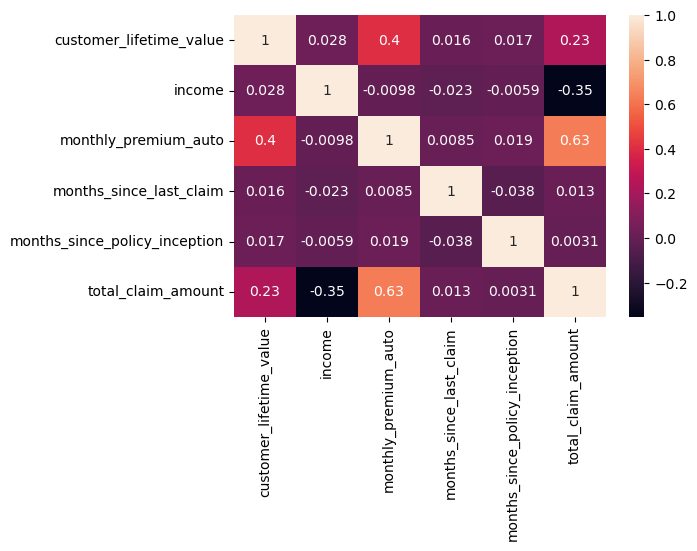

In [105]:
matrix_1 = set_1.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_1, annot=True)
plt.show()

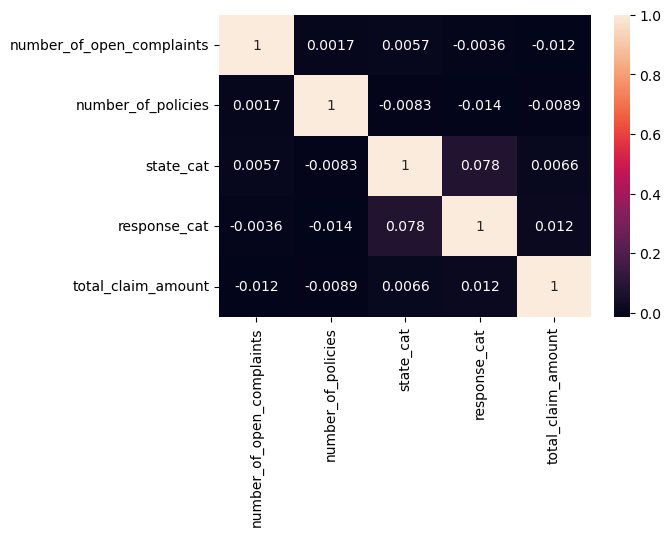

In [106]:
matrix_2 = set_2.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_2, annot=True)
plt.show()

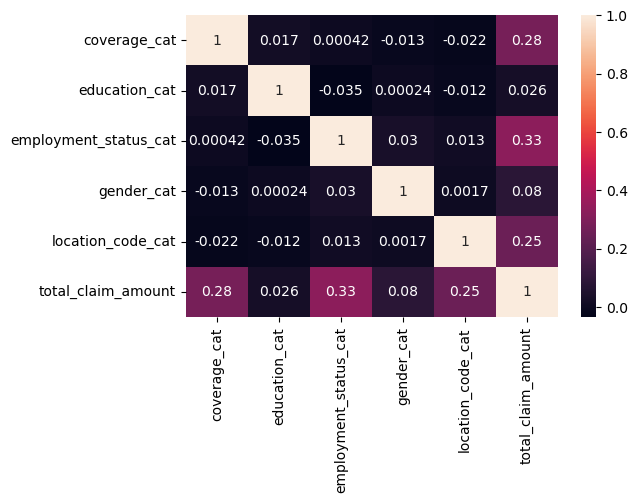

In [107]:
matrix_3 = set_3.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_3, annot=True)
plt.show()

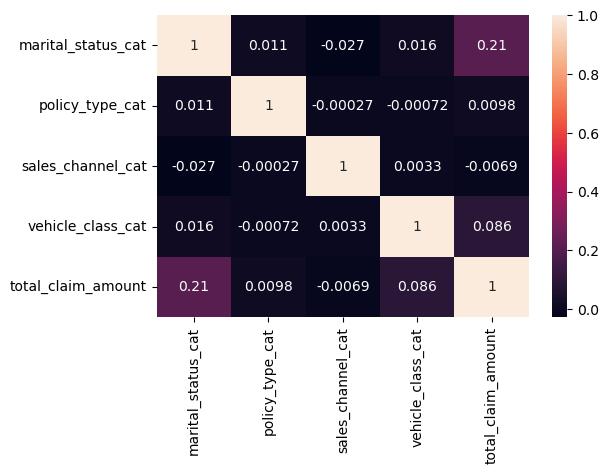

In [108]:
matrix_4 = set_4.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_4, annot=True)
plt.show()

As seen previously, the only variable that presents a strong correlation with total_claim_amount is monthly_premium_auto (0.63), followed by income (weak correlation: 0.35) and employmet_status_cat (also weak correlation: 0.33). We're going to use both variables in three different linear models.

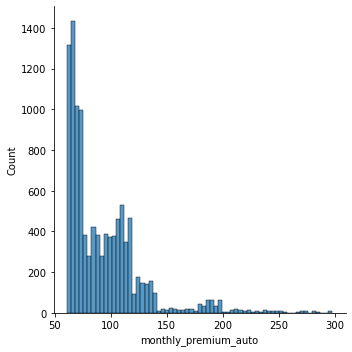

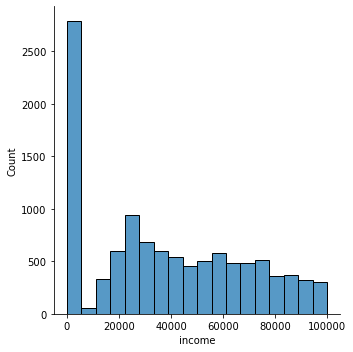

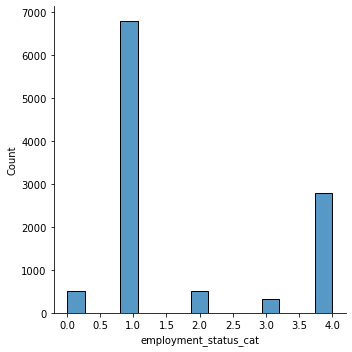

In [109]:
# Let's recover our X and y variables
y = x_values['total_claim_amount']
X_1 = x_values[["monthly_premium_auto","income", 'employment_status_cat']].copy()
X_2 = x_values[["monthly_premium_auto","income"]].copy()
X_3 = x_values[["monthly_premium_auto"]].copy()

for i in X_1:
    sns.displot(X_1[i])
    plt.show()

*Linear Model with monthly_premium_auto, income and employment_status_cat*

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=50)

transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

In [111]:
lm_1 = linear_model.LinearRegression()
lm_1.fit(X_train_norm,y_train)

y_pred_train = lm_1.predict(X_train_norm)
y_pred_test = lm_1.predict(X_test_norm)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.5277704182095366
MSE for training is: 39217.82389060124
RMSE for training is: 198.03490573785533
MAE for training is: 142.57951504564411
MAPE for training is: 708693106855240.6
------------------------
R2 score por testing is: 0.5421680264369617
MSE for testing is: 41533.41542702605
RMSE for testing is: 203.79748631184353
MAE for testing is: 147.84490599993515
MAPE for testing is: 283713622337028.7


In [112]:
results_train = pd.DataFrame(y_train).copy()
results_train['y_pred'] = y_pred_train
results_train['residuals'] = results_train['total_claim_amount'] - results_train['y_pred']
results_train.head()

,total_claim_amount,y_pred,residuals
6572,312.0,443.161645,-131.161645
3355,89.0,118.011517,-29.011517
2672,178.0,349.369721,-171.369721
9484,399.0,367.932962,31.067038
1486,329.0,317.035116,11.964884


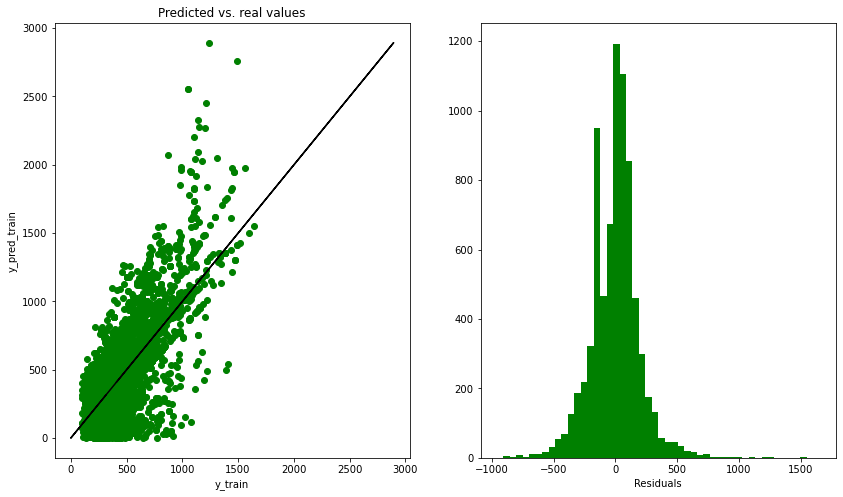

In [113]:
fig, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].scatter(x=results_train['y_pred'], y=results_train['total_claim_amount'] , color = 'green')
ax[0].plot(results_train['total_claim_amount'], results_train['total_claim_amount'], color = 'black')
ax[0].set_xlabel("y_train")
ax[0].set_ylabel("y_pred_train")
ax[0].set_title("Predicted vs. real values")
ax[1].hist(results_train['residuals'], color = "green", bins = 50)
ax[1].set_xlabel("Residuals")
plt.show()

*Linear Model with monthly_premium_auto and income*

In [114]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3, random_state=50)

transformer = MinMaxScaler()
transformer.fit(X_train_2)
X_train_norm_2 = transformer.transform(X_train_2)
X_train_norm_2 = pd.DataFrame(X_train_norm_2, columns=X_train_2.columns)
X_test_norm_2 = transformer.transform(X_test_2)
X_test_norm_2 = pd.DataFrame(X_test_norm_2, columns=X_test_2.columns)

In [115]:
lm_2 = linear_model.LinearRegression()
lm_2.fit(X_train_norm_2,y_train_2)

y_pred_train_2 = lm_2.predict(X_train_norm_2)
y_pred_test_2 = lm_2.predict(X_test_norm_2)

R2_train_2 = r2_score(y_train_2, y_pred_train_2)
R2_test_2 = r2_score(y_test_2, y_pred_test_2)

print("R2 score por training is:", r2_score(y_train_2, y_pred_train_2))
print("MSE for training is:", mean_squared_error(y_train_2, y_pred_train_2))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train_2, y_pred_train_2)))
print("MAE for training is:", mean_absolute_error(y_train_2, y_pred_train_2))
print("MAPE for training is:", mean_absolute_percentage_error(y_train_2, y_pred_train_2))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test_2, y_pred_test_2))
print("MSE for testing is:", mean_squared_error(y_test_2, y_pred_test_2))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test_2, y_pred_test_2)))
print("MAE for testing is:", mean_absolute_error(y_test_2, y_pred_test_2))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test_2, y_pred_test_2))

R2 score por training is: 0.5159698647818081
MSE for training is: 40197.83879010333
RMSE for training is: 200.49398691757148
MAE for training is: 143.24240957941407
MAPE for training is: 652523224917432.2
------------------------
R2 score por testing is: 0.5292635797861007
MSE for testing is: 42704.07578836996
RMSE for testing is: 206.64964502357597
MAE for testing is: 148.78676193570564
MAPE for testing is: 245880779700771.88


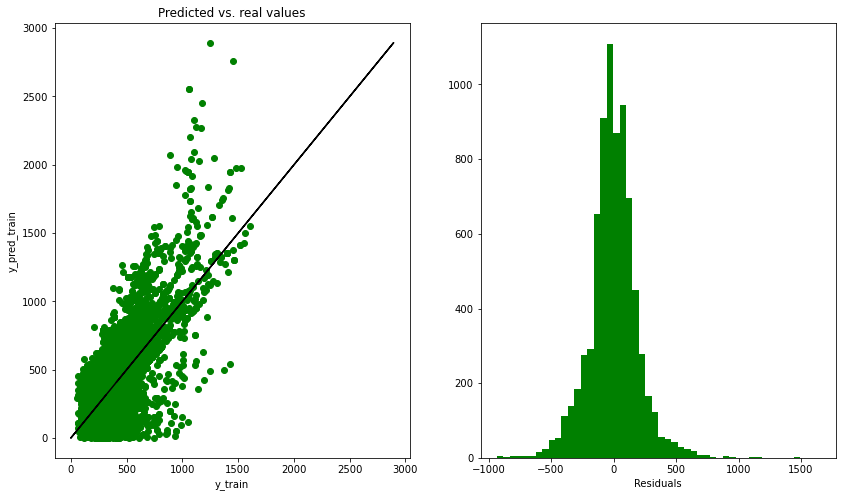

In [116]:
results_train_2 = pd.DataFrame(y_train_2).copy()
results_train_2['y_pred'] = y_pred_train_2
results_train_2['residuals'] = results_train_2['total_claim_amount'] - results_train_2['y_pred']
results_train_2.head()

fig, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].scatter(x=results_train_2['y_pred'], y=results_train_2['total_claim_amount'] , color = 'green')
ax[0].plot(results_train_2['total_claim_amount'], results_train_2['total_claim_amount'], color = 'black')
ax[0].set_xlabel("y_train")
ax[0].set_ylabel("y_pred_train")
ax[0].set_title("Predicted vs. real values")
ax[1].hist(results_train_2['residuals'], color = "green", bins = 50)
ax[1].set_xlabel("Residuals")
plt.show()

*Linear Model with monthly_premium_auto*

In [117]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.3, random_state=50)

transformer = MinMaxScaler()
transformer.fit(X_train_3)
X_train_norm_3 = transformer.transform(X_train_3)
X_train_norm_3 = pd.DataFrame(X_train_norm_3, columns=X_train_3.columns)
X_test_norm_3 = transformer.transform(X_test_3)
X_test_norm_3 = pd.DataFrame(X_test_norm_3, columns=X_test_3.columns)

In [118]:
lm_3 = linear_model.LinearRegression()
lm_3.fit(X_train_norm_3,y_train_3)

y_pred_train_3 = lm_3.predict(X_train_norm_3)
y_pred_test_3 = lm_3.predict(X_test_norm_3)

R2_train_3 = r2_score(y_train_3, y_pred_train_3)
R2_test_3 = r2_score(y_test_3, y_pred_test_3)

print("R2 score por training is:", r2_score(y_train_3, y_pred_train_3))
print("MSE for training is:", mean_squared_error(y_train_3, y_pred_train_3))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train_3, y_pred_train_3)))
print("MAE for training is:", mean_absolute_error(y_train_3, y_pred_train_3))
print("MAPE for training is:", mean_absolute_percentage_error(y_train_3, y_pred_train_3))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test_3, y_pred_test_3))
print("MSE for testing is:", mean_squared_error(y_test_3, y_pred_test_3))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test_3, y_pred_test_3)))
print("MAE for testing is:", mean_absolute_error(y_test_3, y_pred_test_3))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test_3, y_pred_test_3))

R2 score por training is: 0.3916815370217245
MSE for training is: 50519.76256978535
RMSE for training is: 224.7660173820441
MAE for training is: 150.03298860939202
MAPE for training is: 1027554751276717.6
------------------------
R2 score por testing is: 0.41489177248156783
MSE for testing is: 53079.611050685766
RMSE for testing is: 230.390127936693
MAE for testing is: 154.38800674080954
MAPE for testing is: 480404961553590.5


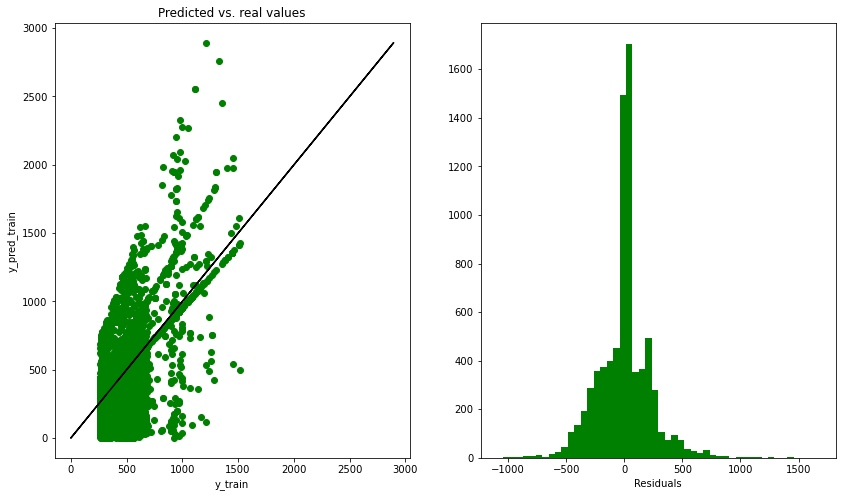

In [119]:
results_train_3 = pd.DataFrame(y_train_3).copy()
results_train_3['y_pred'] = y_pred_train_3
results_train_3['residuals'] = results_train_3['total_claim_amount'] - results_train_3['y_pred']
results_train_3.head()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes[0].scatter(x=results_train_3['y_pred'], y=results_train_3['total_claim_amount'] , color = 'green')
axes[0].plot(results_train_3['total_claim_amount'], results_train_3['total_claim_amount'], color = 'black')
axes[0].set_xlabel("y_train")
axes[0].set_ylabel("y_pred_train")
axes[0].set_title("Predicted vs. real values")
axes[1].hist(results_train_3['residuals'], color = "green", bins = 50)
axes[1].set_xlabel("Residuals")
plt.show()

**Model 1 seems to perform better than the others, but it only can explains 54% of our data.

## Part 7

In [120]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

**Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:**

- **use the concept of multicollinearity and remove insignificant variables**
- **use a different method of scaling the numerical variables**
- **use a different ratio of train test split**
- **use the transformation on numerical columns which align it more towards a normal distribution**

#### Our model performance is not really good, as it can only give an explanation for 54% of the data. In order to improve it, we're going to apply the following options (because we already used the concept of multicollinearity before):

- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

Using a different ratio of train-test split.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=.2, random_state=50)

transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

In [122]:
lm_1 = linear_model.LinearRegression()
lm_1.fit(X_train_norm,y_train)

y_pred_train = lm_1.predict(X_train_norm)
y_pred_test = lm_1.predict(X_test_norm)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.525666632226206
MSE for training is: 39850.79805723532
RMSE for training is: 199.6266466612995
MAE for training is: 143.79539860373393
MAPE for training is: 621974372042907.8
------------------------
R2 score por testing is: 0.5569528778599581
MSE for testing is: 40192.09614182546
RMSE for testing is: 200.47966515790438
MAE for testing is: 145.28769666150595
MAPE for testing is: 429667380975853.5


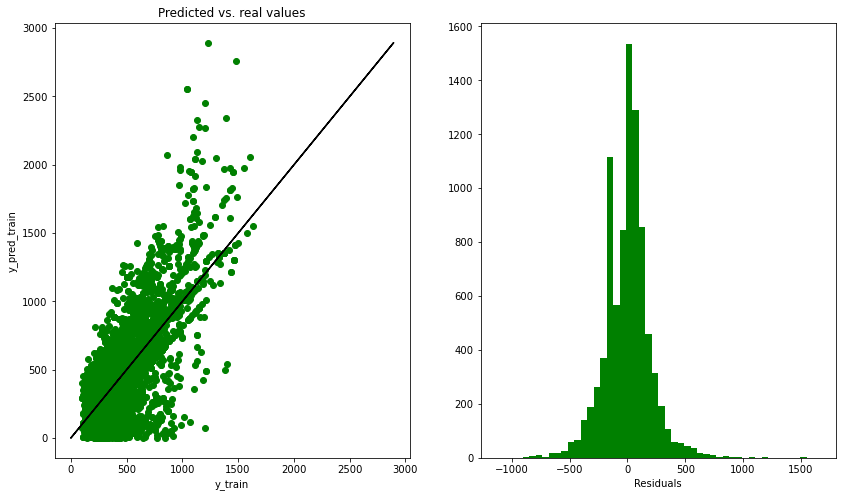

In [123]:
results_train = pd.DataFrame(y_train).copy()
results_train['y_pred'] = y_pred_train
results_train['residuals'] = results_train['total_claim_amount'] - results_train['y_pred']
results_train.head()

fig, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].scatter(x=results_train['y_pred'], y=results_train['total_claim_amount'] , color = 'green')
ax[0].plot(results_train['total_claim_amount'], results_train['total_claim_amount'], color = 'black')
ax[0].set_xlabel("y_train")
ax[0].set_ylabel("y_pred_train")
ax[0].set_title("Predicted vs. real values")
ax[1].hist(results_train['residuals'], color = "green", bins = 50)
ax[1].set_xlabel("Residuals")
plt.show()

**Using a different ratio of train-test split has improved performance slightly.**

Performance of Linear Model with RobustScaler

In [ ]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_1, y, test_size=0.3, random_state=50)

transformer = RobustScaler()
transformer.fit(X_train_rs)
X_train_rs = transformer.transform(X_train_rs)
X_train_rs = pd.DataFrame(X_train_rs, columns=X_train.columns)
X_test_rs = transformer.transform(X_test_rs)
X_test_rs = pd.DataFrame(X_test_rs, columns=X_test.columns)

In [ ]:
lm_rs = linear_model.LinearRegression()
lm_rs.fit(X_train_rs,y_train_rs)

y_pred_train_rs = lm_rs.predict(X_train_rs)
y_pred_test_rs = lm_rs.predict(X_test_rs)

R2_train_rs = r2_score(y_train_rs, y_pred_train_rs)
R2_test_rs = r2_score(y_test_rs, y_pred_test_rs)

print("R2 score por training is:", r2_score(y_train_rs, y_pred_train_rs))
print("MSE for training is:", mean_squared_error(y_train_rs, y_pred_train_rs))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train_rs, y_pred_train_rs)))
print("MAE for training is:", mean_absolute_error(y_train_rs, y_pred_train_rs))
print("MAPE for training is:", mean_absolute_percentage_error(y_train_rs, y_pred_train_rs))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test_rs, y_pred_test_rs))
print("MSE for testing is:", mean_squared_error(y_test_rs, y_pred_test_rs))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test_rs, y_pred_test_rs)))
print("MAE for testing is:", mean_absolute_error(y_test_rs, y_pred_test_rs))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test_rs, y_pred_test_rs))

In [ ]:
results_train_rs = pd.DataFrame(y_train_rs).copy()
results_train_rs['y_pred'] = y_pred_train_rs
results_train_rs['residuals'] = results_train_rs['total_claim_amount'] - results_train_rs['y_pred']
results_train_rs.head()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes[0].scatter(x=results_train_rs['y_pred'], y=results_train_rs['total_claim_amount'] , color = 'green')
axes[0].plot(results_train_rs['total_claim_amount'], results_train_rs['total_claim_amount'], color = 'black')
axes[0].set_xlabel("y_train")
axes[0].set_ylabel("y_pred_train")
axes[0].set_title("Predicted vs. real values")
axes[1].hist(results_train_rs['residuals'], color = "green", bins = 50)
axes[1].set_xlabel("Residuals")
plt.show()

**Performance has improved slightly, but nothing significant. Let's look at the distribution of the variables we're using in our model.**

In [ ]:
# Distributions before applying any kind of transformation
fig, ax = plt.subplots(1, 3, figsize = (10,3), dpi = 100)
ax[0].hist(x_values['monthly_premium_auto'])
ax[1].hist(x_values['income'])
ax[2].hist(x_values['employment_status_cat'])
ax[0].set_title('Monthly_premium_auto')
ax[1].set_title('Income')
ax[2].set_title('Employment status cat')

plt.show()

In [ ]:
# Applying PowerTransformer to scaled data
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(X_1)
pt_data = pt.transform(X_1)
x_powertransf_df = pd.DataFrame(pt_data, columns= X_1.columns)

In [ ]:
# Distributions after applying PowerTransformation()
fig, ax = plt.subplots(1, 3, figsize = (15,5), dpi = 100)
ax[0].hist(x_powertransf_df['monthly_premium_auto'])
ax[1].hist(x_powertransf_df['income'])
ax[2].hist(x_powertransf_df['employment_status_cat'])
ax[0].set_title('Monthly_premium_auto')
ax[1].set_title('Income')
ax[2].set_title('Employment status cat')
plt.show()

Linear Model 1 with PowerTransformed applied

In [ ]:
X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(x_powertransf_df, y, test_size=0.3, random_state=50)

transformer = RobustScaler()
transformer.fit(X_train_pt)
X_train_pt = transformer.transform(X_train_pt)
X_train_pt = pd.DataFrame(X_train_pt, columns=x_powertransf_df.columns)
X_test_pt = transformer.transform(X_test_pt)
X_test_pt = pd.DataFrame(X_test_pt, columns=x_powertransf_df.columns)

In [ ]:
lm_pt = linear_model.LinearRegression()
lm_pt.fit(X_train_pt,y_train_pt)

y_pred_train_pt = lm_rs.predict(X_train_pt)
y_pred_test_pt = lm_rs.predict(X_test_pt)

R2_train_pt = r2_score(y_train_pt, y_pred_train_rs)
R2_test_pt = r2_score(y_test_pt, y_pred_test_pt)

print("R2 score por training is:", r2_score(y_train_pt, y_pred_train_pt))
print("MSE for training is:", mean_squared_error(y_train_pt, y_pred_train_pt))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train_pt, y_pred_train_pt)))
print("MAE for training is:", mean_absolute_error(y_train_pt, y_pred_train_pt))
print("MAPE for training is:", mean_absolute_percentage_error(y_train_pt, y_pred_train_pt))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test_pt, y_pred_test_pt))
print("MSE for testing is:", mean_squared_error(y_test_pt, y_pred_test_pt))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test_pt, y_pred_test_pt)))
print("MAE for testing is:", mean_absolute_error(y_test_pt, y_pred_test_pt))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test_pt, y_pred_test_pt))

**Performance has declined substantially. Looks like our best option with this concrete variable ('total claim amount') would be increase the size of our train set.**